In [29]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [38]:
X = pd.read_csv("../X_train_J01Z4CN.csv")
y = pd.read_csv("../y_train_OXxrJt1.csv")
y = y.drop(columns = ['id_annonce'])
X = X.drop(columns = ['id_annonce'])

In [39]:
X.head()

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Preprocessing function
def preprocess(df):
    df = df.copy() # Make copy so we don't ruin the original dataframe
    df = df.drop(columns=["Id"], errors='ignore') # Drop Id column
    
    numeric_cols = df.select_dtypes(np.number).columns # Numerical column name
    numeric_cols = numeric_cols.drop("SalePrice", errors='ignore') # Drop label
    
    
    #one hot encoding for property_type
    df = pd.get_dummies(df, columns=['property_type'], drop_first=False)

    categorical_cols =  df.select_dtypes(include=['object']).columns # Categorical column name
    
    # Label encoding for city
    le = LabelEncoder()
    df['city'] = le.fit_transform(df['city'])

    
    df_categorical = (df[categorical_cols])
    
    df_numerical = df[numeric_cols].apply(lambda x: (x - x.mean()) / (x.std())) # Normalize every numerical column
    df_numerical = df_numerical.fillna(0) # Fill in missing value with mean 0
    
    df = pd.concat([df_numerical, df_categorical], axis=1) # Bind numerical column and categorical column
    
    return df

In [41]:
df_train_y = np.log(y, where=y != 0) # Scale the target
df_train_X = preprocess(X) # Preprocess the inpu

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_y, test_size=0.2, random_state=42)

In [45]:
df_train_X.head()

,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,...,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,city,energy_performance_category,ghg_category,exposition
0,-1.231562,1.731995,-1.642934,-0.184657,0.000000,0.000000,0.000000,0.000000,-0.416833,-0.401053,...,1.493302,-0.500219,-0.238611,-0.203714,-0.061979,-0.015521,8452,NaN,NaN,NaN
1,-0.360861,0.876577,0.541587,-0.179797,-0.071299,0.000000,0.022283,0.064894,0.252560,0.526369,...,-0.669639,-0.500219,-0.238611,-0.203714,-0.061979,-0.015521,8234,D,E,NaN
2,0.602838,-1.478417,-0.641102,-0.185018,0.000000,-0.066629,0.000000,0.000000,-0.751529,-0.864763,...,-0.669639,-0.500219,-0.238611,-0.203714,-0.061979,-0.015521,5235,NaN,NaN,Sud
3,0.315345,-1.731917,-0.320696,-0.170437,0.000000,-0.059388,0.014693,0.039135,-0.082136,0.062658,...,1.493302,-0.500219,-0.238611,-0.203714,-0.061979,-0.015521,1929,D,E,NaN
4,-0.351001,0.856795,0.534888,-0.180157,-0.071299,0.000000,0.000000,0.000000,-0.082136,0.062658,...,-0.669639,-0.500219,-0.238611,-0.203714,-0.061979,-0.015521,4476,NaN,NaN,NaN


In [44]:
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

model.add(Dense(25, activation='relu', input_shape=(25,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))



# Compile the model with an optimizer and a loss function
model.compile(optimizer='adam', loss='mse')

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=200, verbose=False)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

ValueError: x and y must be the same size

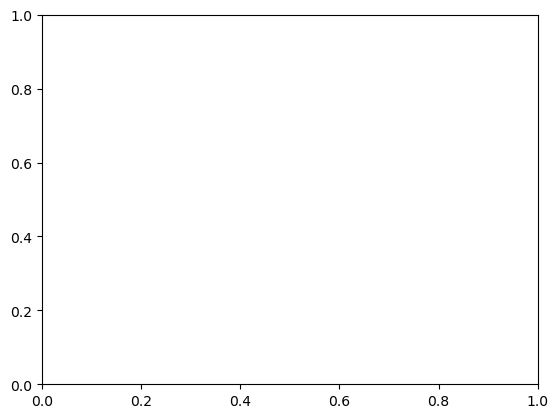

In [24]:
# Plot the results
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_test, y_test, 'r')
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_percentage_error
prediction = model.predict(X_test)
mean_absolute_percentage_error(np.exp(y_test), np.exp(prediction))*100

234/234 [==============================] - 1s 4ms/step


42.05763252034404